In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
score_qwen2_prefix_golden = pd.read_csv("benchmarking_test/metrics/qwen2_prefix_golden_test_metrics.csv", delimiter="\t")["overall_metric"].iloc[0]
score_qwen2_prefix_teacher = pd.read_csv("benchmarking_test/metrics/qwen2_prefix_teacher_test_metrics.csv", delimiter="\t")["overall_metric"].iloc[0]
score_qwen2_lora_golden = pd.read_csv("benchmarking_test/metrics/Qwen2_LoRA_test_metrics.csv", delimiter="\t")["overall_metric"].iloc[0]
score_qwen2_lora_teacher = pd.read_csv("benchmarking_test/metrics/Qwen2_LoRA_KD_test_metrics.csv", delimiter="\t")["overall_metric"].iloc[0]
score_paligemma_prefix_golden = pd.read_csv("benchmarking_test/metrics/paligemma_prefix_golden_test_metrics.csv", delimiter="\t")["overall_metric"].iloc[0]
score_paligemma_prefix_teacher = pd.read_csv("benchmarking_test/metrics/paligemma_prefix_teacher_test_metrics.csv", delimiter="\t")["overall_metric"].iloc[0]
score_paligemma_lora_golden = pd.read_csv("benchmarking_test/metrics/paligemma_LoRA_golden_test_metrics.csv", delimiter="\t")["overall_metric"].iloc[0]
score_paligemma_lora_teacher = pd.read_csv("benchmarking_test/metrics/paligemma_LoRA_teacher_test_metrics.csv", delimiter="\t")["overall_metric"].iloc[0]
score_qwen2_golden = pd.read_csv("benchmarking_test/metrics/qwen2_test_metrics.csv", delimiter="\t")["overall_metric"].iloc[0]
score_paligemma_golden = pd.read_csv("benchmarking_test/metrics/paligemma_test_metrics.csv", delimiter="\t")["overall_metric"].iloc[0]

In [25]:
score_qwen2_golden

15.506490726011425

In [26]:
scores = [
    score_qwen2_prefix_golden,
    score_qwen2_prefix_teacher,
    score_qwen2_lora_golden,
    score_qwen2_lora_teacher,
    score_paligemma_prefix_golden,
    score_paligemma_prefix_teacher,
    score_paligemma_lora_golden,
    score_paligemma_lora_teacher
]
model = [
    "score_qwen2_prefix_golden",
    "scor2222e_qwen2_prefix_teacher",
    "score_qwen2_lora_golden",
    "score_qwen2_lora_teacher",
    "score_paligemma_prefix_golden",
    "score_paligemma_prefix_teacher",
    "score_paligemma_lora_golden",
    "score_paligemma_lora_teacher"
]
data = pd.DataFrame({"model": model, "scores": scores})

In [27]:
data

,model,scores
0,score_qwen2_prefix_golden,10.607564
1,scor2222e_qwen2_prefix_teacher,9.972385
2,score_qwen2_lora_golden,14.436662
3,score_qwen2_lora_teacher,10.874317
4,score_paligemma_prefix_golden,16.435761
5,score_paligemma_prefix_teacher,11.320851
6,score_paligemma_lora_golden,13.619906
7,score_paligemma_lora_teacher,11.983450


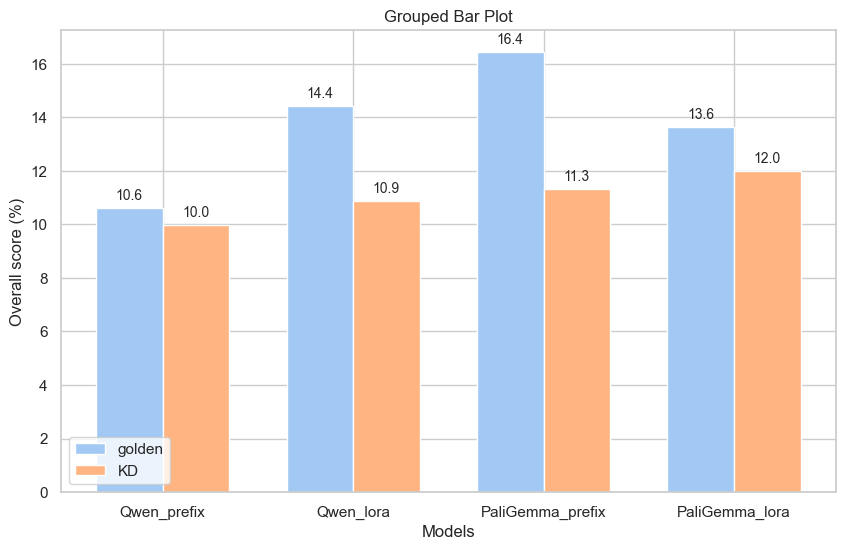

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Data
scores = [
    score_qwen2_prefix_golden,
    score_qwen2_prefix_teacher,
    score_qwen2_lora_golden,
    score_qwen2_lora_teacher,
    score_paligemma_prefix_golden,
    score_paligemma_prefix_teacher,
    score_paligemma_lora_golden,
    score_paligemma_lora_teacher
]

# Define the groups and labels
group_labels = ["Qwen_prefix", "Qwen_lora", "PaliGemma_prefix", "PaliGemma_lora"]
scores_per_group = [
    [score_qwen2_prefix_golden, score_qwen2_prefix_teacher],
    [score_qwen2_lora_golden, score_qwen2_lora_teacher],
    [score_paligemma_prefix_golden, score_paligemma_prefix_teacher],
    [score_paligemma_lora_golden, score_paligemma_lora_teacher]
]
colors = sns.color_palette("pastel", 8)

# Bar settings
bar_width = 0.35  # Width of each bar
x = np.arange(len(group_labels))  # Positions for the groups

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
for i, scores in enumerate(scores_per_group):
    plt.bar(
        x[i] - bar_width / 2, scores[0], width=bar_width, label=f"{group_labels[i]}_golden", color=colors[0]
    )
    plt.bar(
        x[i] + bar_width / 2, scores[1], width=bar_width, label=f"{group_labels[i]}_teacher", color=colors[1]
    )
    # Add text annotations
    plt.text(x[i] - bar_width / 2, scores[0] + 0.2, str(round(scores[0], 1)), ha='center', va='bottom', fontsize=10)
    plt.text(x[i] + bar_width / 2, scores[1] + 0.2, str(round(scores[1], 1)), ha='center', va='bottom', fontsize=10)

# Customize plot
plt.xticks(x, group_labels)  # Add group labels to the x-axis
plt.title("Grouped Bar Plot")
plt.xlabel("Models")
plt.ylabel("Overall score (%)")
plt.legend(["golden", "KD"], loc="lower left")
plt.show()

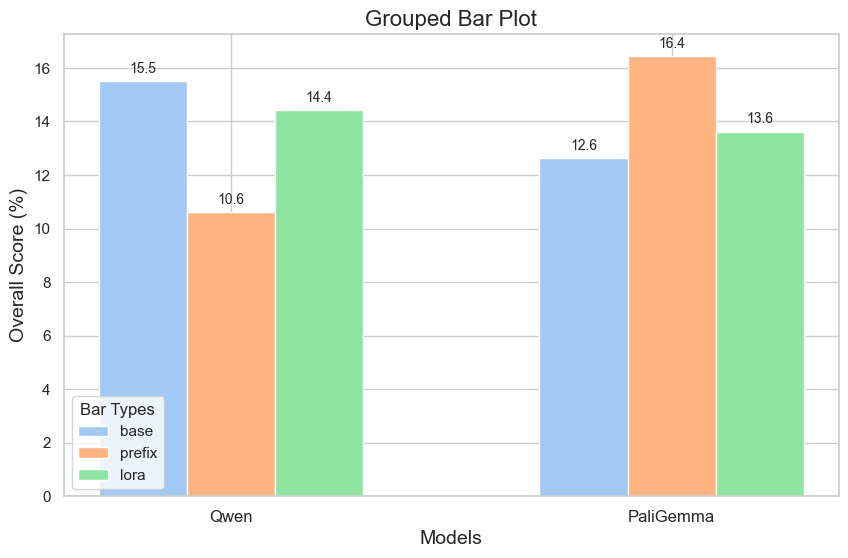

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data
scores = [
    score_qwen2_golden,
    score_qwen2_prefix_golden,
    score_qwen2_lora_golden,
    score_paligemma_golden,
    score_paligemma_prefix_golden,
    score_paligemma_lora_golden,
]

# Define the groups and labels
group_labels = ["Qwen", "PaliGemma"]  # Two main groups
scores_per_group = [
    [score_qwen2_golden, score_qwen2_prefix_golden, score_qwen2_lora_golden],
    [score_paligemma_golden, score_paligemma_prefix_golden, score_paligemma_lora_golden],
]
bar_labels = ["base", "prefix", "lora"]  # Subcategories within each group

# Colors
colors = sns.color_palette("pastel", 6)  # One color for each bar type

# Bar settings
bar_width = 0.2  # Width of each bar
x = np.arange(len(group_labels))  # Positions for the main groups

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

for i, group_scores in enumerate(scores_per_group):
    for j, score in enumerate(group_scores):
        # Position bars for subcategories within each group
        plt.bar(
            x[i] + (j - 1) * bar_width,  # Offset bars to the left/right of the group center
            score,
            width=bar_width,
            label=f"{group_labels[i]}_{bar_labels[j]}" if i == 0 else None,  # Avoid duplicate labels in legend
            color=colors[j],
        )
        # Add text annotations
        plt.text(x[i] + (j - 1) * bar_width, score + 0.2, str(round(score, 1)), ha='center', va='bottom', fontsize=10)

# Customize plot
plt.xticks(x, group_labels, fontsize=12)  # Add group labels to the x-axis
plt.title("Grouped Bar Plot", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Overall Score (%)", fontsize=14)
plt.legend(bar_labels, title="Bar Types", loc="lower left")
plt.show()